Buisness Problem: to Identify the potential candidates whom they can offer job (to process further for interview).

 

In [2]:
#load some library
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [3]:
#read file
sample = pd.read_csv('sample.csv')

In [4]:
# first five 
sample.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [5]:
sample.isna().sum()

Application_ID                  0
Current City                    0
Python (out of 3)               0
R Programming (out of 3)        0
Deep Learning (out of 3)        0
PHP (out of 3)                  0
MySQL (out of 3)                0
HTML (out of 3)                 0
CSS (out of 3)                  0
JavaScript (out of 3)           0
AJAX (out of 3)                 0
Bootstrap (out of 3)            0
MongoDB (out of 3)              0
Node.js (out of 3)              0
ReactJS (out of 3)              0
Other skills                   14
Degree                         12
Stream                         18
Current Year Of Graduation      0
Performance_PG                289
Performance_UG                 54
Performance_12                163
Performance_10                177
dtype: int64

In [6]:
sample.shape

(392, 23)

In [7]:
sample=sample.drop(columns="Performance_PG",axis=1)

In [8]:
sample=sample.drop(columns="Performance_UG",axis=1)

In [9]:
sample=sample.drop(columns="Performance_12",axis=1)

In [10]:
sample=sample.drop(columns="Performance_10",axis=1)

In [11]:
sample.dropna(axis = 0, inplace = True) 

In [12]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 391
Data columns (total 19 columns):
Application_ID                350 non-null object
Current City                  350 non-null object
Python (out of 3)             350 non-null int64
R Programming (out of 3)      350 non-null int64
Deep Learning (out of 3)      350 non-null int64
PHP (out of 3)                350 non-null int64
MySQL (out of 3)              350 non-null int64
HTML (out of 3)               350 non-null int64
CSS (out of 3)                350 non-null int64
JavaScript (out of 3)         350 non-null int64
AJAX (out of 3)               350 non-null int64
Bootstrap (out of 3)          350 non-null int64
MongoDB (out of 3)            350 non-null int64
Node.js (out of 3)            350 non-null int64
ReactJS (out of 3)            350 non-null int64
Other skills                  350 non-null object
Degree                        350 non-null object
Stream                        350 non-null object
Current 

In [13]:
sample['Current City'].value_counts()

Bangalore        190
Hyderabad         16
Banglore          13
Chennai           11
Pune              10
Delhi              8
Durgapur           5
Noida              5
Durg               5
Mahé               4
Jaipur             4
Kanpur             4
Coimbatore         3
Bhubaneswar        3
Nagpur             3
Ranchi             3
Indore             3
Namakkal           2
Kannur             2
Thrissur           2
Kochi              2
Kozhikode          2
Shillong           2
Dehradun           2
Jamshedpur         2
Mysuru             2
Varanasi           2
Tirupati           2
Kolkata            2
Raigarh            2
                ... 
Vadodara           2
Jalandhar          2
Chandigarh         1
Barhampur          1
Meerut             1
Tezpur             1
Tiruppur           1
Vellore            1
Haryana            1
Agartala           1
Greater Noida      1
Ajmer              1
Nashik             1
Vasco Da Gama      1
Roorkee            1
Raebareli          1
Idupulapaya  

In [14]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()
sample['Stream']=l1.fit_transform(sample['Stream'])
sample['Degree']=l2.fit_transform(sample['Degree'])
sample['Other skills']=l3.fit_transform(sample['Other skills'])

In [15]:
sample['Current City'].value_counts()

Bangalore        190
Hyderabad         16
Banglore          13
Chennai           11
Pune              10
Delhi              8
Durgapur           5
Noida              5
Durg               5
Mahé               4
Jaipur             4
Kanpur             4
Coimbatore         3
Bhubaneswar        3
Nagpur             3
Ranchi             3
Indore             3
Namakkal           2
Kannur             2
Thrissur           2
Kochi              2
Kozhikode          2
Shillong           2
Dehradun           2
Jamshedpur         2
Mysuru             2
Varanasi           2
Tirupati           2
Kolkata            2
Raigarh            2
                ... 
Vadodara           2
Jalandhar          2
Chandigarh         1
Barhampur          1
Meerut             1
Tezpur             1
Tiruppur           1
Vellore            1
Haryana            1
Agartala           1
Greater Noida      1
Ajmer              1
Nashik             1
Vasco Da Gama      1
Roorkee            1
Raebareli          1
Idupulapaya  

In [16]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
sample['Current City']= label_encoder.fit_transform(sample['Current City']) 
sample['Application_ID'] = label_encoder.fit_transform(sample['Application_ID'])


In [17]:
#sample.Application_ID  = sample.Application_ID.apply(lambda x: x.isdigit())

In [18]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 391
Data columns (total 19 columns):
Application_ID                350 non-null int32
Current City                  350 non-null int32
Python (out of 3)             350 non-null int64
R Programming (out of 3)      350 non-null int64
Deep Learning (out of 3)      350 non-null int64
PHP (out of 3)                350 non-null int64
MySQL (out of 3)              350 non-null int64
HTML (out of 3)               350 non-null int64
CSS (out of 3)                350 non-null int64
JavaScript (out of 3)         350 non-null int64
AJAX (out of 3)               350 non-null int64
Bootstrap (out of 3)          350 non-null int64
MongoDB (out of 3)            350 non-null int64
Node.js (out of 3)            350 non-null int64
ReactJS (out of 3)            350 non-null int64
Other skills                  350 non-null int32
Degree                        350 non-null int32
Stream                        350 non-null int32
Current Year 

In [19]:
# columns 
sample.columns

Index(['Application_ID', 'Current City', 'Python (out of 3)',
       'R Programming (out of 3)', 'Deep Learning (out of 3)',
       'PHP (out of 3)', 'MySQL (out of 3)', 'HTML (out of 3)',
       'CSS (out of 3)', 'JavaScript (out of 3)', 'AJAX (out of 3)',
       'Bootstrap (out of 3)', 'MongoDB (out of 3)', 'Node.js (out of 3)',
       'ReactJS (out of 3)', 'Other skills', 'Degree', 'Stream',
       'Current Year Of Graduation'],
      dtype='object')

In [20]:
# Dimension
sample.shape

(350, 19)

In [21]:
#Percentage of skills
sample['Other skills'].value_counts()/len('sample')

175    0.666667
256    0.666667
113    0.500000
261    0.500000
95     0.500000
217    0.500000
143    0.500000
220    0.333333
219    0.333333
232    0.333333
62     0.333333
72     0.333333
49     0.333333
46     0.333333
63     0.333333
64     0.333333
213    0.333333
67     0.333333
43     0.333333
68     0.333333
69     0.333333
70     0.333333
197    0.333333
199    0.333333
40     0.333333
133    0.333333
140    0.333333
130    0.333333
125    0.333333
107    0.333333
         ...   
207    0.166667
206    0.166667
205    0.166667
204    0.166667
203    0.166667
202    0.166667
201    0.166667
200    0.166667
198    0.166667
196    0.166667
195    0.166667
194    0.166667
193    0.166667
191    0.166667
172    0.166667
190    0.166667
189    0.166667
188    0.166667
186    0.166667
184    0.166667
182    0.166667
181    0.166667
180    0.166667
179    0.166667
178    0.166667
177    0.166667
176    0.166667
174    0.166667
173    0.166667
0      0.166667
Name: Other skills, Leng

In [22]:
# Describe of mean median max min values 
sample.describe()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,174.500000,14.211429,1.428571,0.571429,0.471429,0.637143,0.428571,1.380000,1.065714,0.788571,0.017143,0.291429,0.040000,0.091429,0.191429,139.805714,11.805714,29.951429,2018.911429
std,101.180532,15.770957,0.954126,0.904801,0.848417,0.928562,0.859323,1.063136,1.026146,0.978793,0.129989,0.746096,0.269989,0.411421,0.513916,82.931753,6.627370,17.765116,2.323577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,87.250000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,7.000000,16.000000,2019.000000
50%,174.500000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,136.500000,10.000000,25.000000,2019.000000
75%,261.750000,21.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212.750000,18.000000,44.000000,2020.000000
max,349.000000,60.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,287.000000,28.000000,69.000000,2023.000000


In [23]:
#Checking is there na values 
sample.isna().sum()

Application_ID                0
Current City                  0
Python (out of 3)             0
R Programming (out of 3)      0
Deep Learning (out of 3)      0
PHP (out of 3)                0
MySQL (out of 3)              0
HTML (out of 3)               0
CSS (out of 3)                0
JavaScript (out of 3)         0
AJAX (out of 3)               0
Bootstrap (out of 3)          0
MongoDB (out of 3)            0
Node.js (out of 3)            0
ReactJS (out of 3)            0
Other skills                  0
Degree                        0
Stream                        0
Current Year Of Graduation    0
dtype: int64

In [24]:
sample.info() # Data types 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 391
Data columns (total 19 columns):
Application_ID                350 non-null int32
Current City                  350 non-null int32
Python (out of 3)             350 non-null int64
R Programming (out of 3)      350 non-null int64
Deep Learning (out of 3)      350 non-null int64
PHP (out of 3)                350 non-null int64
MySQL (out of 3)              350 non-null int64
HTML (out of 3)               350 non-null int64
CSS (out of 3)                350 non-null int64
JavaScript (out of 3)         350 non-null int64
AJAX (out of 3)               350 non-null int64
Bootstrap (out of 3)          350 non-null int64
MongoDB (out of 3)            350 non-null int64
Node.js (out of 3)            350 non-null int64
ReactJS (out of 3)            350 non-null int64
Other skills                  350 non-null int32
Degree                        350 non-null int32
Stream                        350 non-null int32
Current Year 

In [29]:
sample.head() # see a data 

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation
0,0,4,0,2,0,2,0,2,3,2,0,2,0,0,0,280,9,55,2017
1,1,4,2,0,0,2,2,2,2,2,0,0,0,0,0,182,10,18,2019
2,2,4,3,0,1,2,2,2,0,2,0,0,0,0,0,24,20,13,2018
3,3,4,2,0,2,1,0,2,0,0,0,0,0,0,0,127,7,36,2019
4,4,4,2,0,0,2,0,2,1,1,0,0,2,2,2,228,10,59,2018


In [27]:
# function to normalise
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [28]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(sample.iloc[:,:])

In [30]:
df_norm.head() # 

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation
0,0.000000,0.066667,0.000000,0.666667,0.000000,0.666667,0.000000,0.666667,1.000000,0.666667,0.0,0.666667,0.0,0.0,0.0,0.975610,0.321429,0.797101,0.684211
1,0.002865,0.066667,0.666667,0.000000,0.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.0,0.000000,0.0,0.0,0.0,0.634146,0.357143,0.260870,0.789474
2,0.005731,0.066667,1.000000,0.000000,0.333333,0.666667,0.666667,0.666667,0.000000,0.666667,0.0,0.000000,0.0,0.0,0.0,0.083624,0.714286,0.188406,0.736842
3,0.008596,0.066667,0.666667,0.000000,0.666667,0.333333,0.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.442509,0.250000,0.521739,0.789474
4,0.011461,0.066667,0.666667,0.000000,0.000000,0.666667,0.000000,0.666667,0.333333,0.333333,0.0,0.000000,1.0,1.0,1.0,0.794425,0.357143,0.855072,0.736842


In [31]:
###### screw plot or elbow curve ############
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


In [35]:
import matplotlib.pyplot as plt # library 

([<matplotlib.axis.XTick at 0x1b201480860>,
 <a list of 13 Text xticklabel objects>)

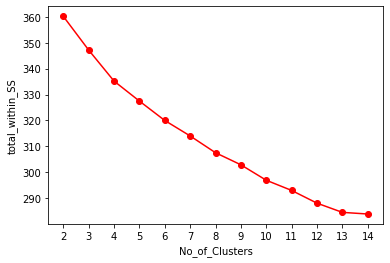

In [36]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k) # To check no of cluster 


In [37]:
model=KMeans(n_clusters=5) # apply k means
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
model.labels_ # getting the labels of clusters assigned to each row 

array([4, 3, 3, 2, 1, 4, 1, 2, 2, 2, 2, 4, 4, 4, 3, 3, 2, 4, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 4, 4,
       2, 3, 0, 4, 2, 0, 4, 4, 2, 2, 2, 2, 4, 3, 2, 2, 3, 3, 1, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 4, 3, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 4, 2, 4, 1, 1, 2, 2, 2, 4, 4, 2, 3, 1, 4, 1, 3,
       2, 2, 2, 3, 2, 4, 2, 2, 4, 4, 4, 3, 3, 1, 2, 4, 2, 1, 2, 4, 2, 2,
       4, 4, 2, 4, 4, 2, 4, 4, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 3, 0,
       0, 0, 2, 2, 4, 4, 2, 4, 4, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 0,
       2, 4, 2, 0, 4, 4, 2, 3, 3, 0, 2, 3, 2, 3, 2, 4, 4, 2, 3, 3, 3, 2,
       1, 0, 1, 2, 2, 4, 2, 2, 4, 0, 0, 0, 3, 3, 0, 0, 2, 1, 0, 4, 3, 0,
       0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 3, 0, 2, 2, 3, 2, 4, 4, 2, 3, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       0, 2, 2, 3, 4, 0, 4, 0, 1, 0, 2, 0, 4, 2, 0,

In [39]:
md=pd.Series(model.labels_) # checking

In [40]:
sample['Cluster']=md # assing

In [43]:
sample.head(10) #

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Cluster
0,0,4,0,2,0,2,0,2,3,2,0,2,0,0,0,280,9,55,2017,4.0
1,1,4,2,0,0,2,2,2,2,2,0,0,0,0,0,182,10,18,2019,3.0
2,2,4,3,0,1,2,2,2,0,2,0,0,0,0,0,24,20,13,2018,3.0
3,3,4,2,0,2,1,0,2,0,0,0,0,0,0,0,127,7,36,2019,2.0
4,4,4,2,0,0,2,0,2,1,1,0,0,2,2,2,228,10,59,2018,1.0
8,5,4,3,0,0,0,0,2,2,0,0,0,0,0,0,203,28,26,2020,2.0
9,6,4,2,0,2,0,0,2,2,2,0,0,0,0,2,252,28,2,2020,2.0
10,7,4,2,0,0,0,0,0,0,0,0,0,0,0,0,135,10,36,2018,2.0
11,8,24,3,0,2,1,0,2,0,0,0,0,0,0,0,271,10,36,2021,4.0
13,9,4,2,2,0,2,1,0,0,0,0,0,0,0,0,80,7,13,2019,4.0


In [46]:
from sklearn.cluster import DBSCAN # try with dbscan

In [47]:
clustering = DBSCAN(eps=3, min_samples=2).fit(df_norm) #


In [48]:
clustering.labels_ #labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
# library
from scipy.cluster.hierarchy import linkage 

import scipy.cluster.hierarchy as sch # for creating dendrogram 

type(df_norm)



pandas.core.frame.DataFrame

In [55]:
z = linkage(df_norm, method="complete",metric="euclidean")  # linkage method

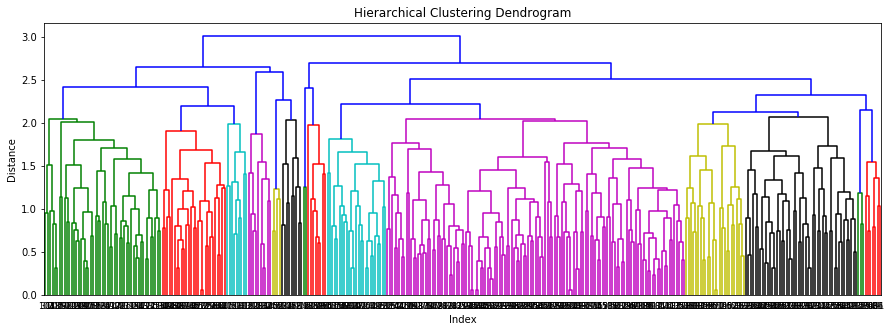

In [57]:

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [60]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=2,linkage='complete',affinity = "euclidean").fit(df_norm) 


In [62]:
cluster_labels=pd.Series(h_complete.labels_)

In [63]:
sample['Clust1']=cluster_labels

In [68]:

cluster_labels

0    242
1    108
dtype: int64

In [65]:
sample.head(7)

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Cluster,clust1
0,0,4,0,2,0,2,0,2,3,2,...,2,0,0,0,280,9,55,2017,4.0,1.0
1,1,4,2,0,0,2,2,2,2,2,...,0,0,0,0,182,10,18,2019,3.0,1.0
2,2,4,3,0,1,2,2,2,0,2,...,0,0,0,0,24,20,13,2018,3.0,0.0
3,3,4,2,0,2,1,0,2,0,0,...,0,0,0,0,127,7,36,2019,2.0,0.0
4,4,4,2,0,0,2,0,2,1,1,...,0,2,2,2,228,10,59,2018,1.0,0.0
8,5,4,3,0,0,0,0,2,2,0,...,0,0,0,0,203,28,26,2020,2.0,1.0
9,6,4,2,0,2,0,0,2,2,2,...,0,0,0,2,252,28,2,2020,2.0,0.0


In [71]:
sample.iloc[:,2:].groupby(sample.clust1).mean()  # with 2 cluster  

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Cluster,clust1
clust1,,,,,,,,,,,,,,,,,,,
0.0,1.417062,0.578199,0.521327,0.658768,0.398104,1.417062,1.047393,0.753555,0.009479,0.265403,0.018957,0.056872,0.222749,145.151659,11.582938,30.886256,2018.890995,1.50237,0.0
1.0,1.640000,0.540000,0.420000,0.580000,0.470000,1.310000,1.070000,0.860000,0.030000,0.330000,0.070000,0.150000,0.190000,144.070000,11.970000,29.000000,2018.710000,3.11000,1.0


Predict:

I categoriesed the deserving candidate through clustering algorithm into two Groups:
The candidate allotated 0 value in clust1 variable should be deserving candidate for the job and the candidate alloted 1 in clust1 variable or column will not applicable for job.

The total Deserving candidates are 242 and the number of non-deserving candidates is 108